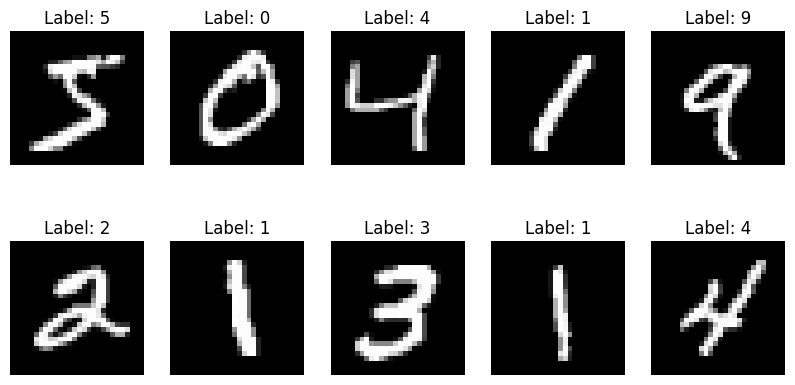

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9290 - loss: 0.2418 - val_accuracy: 0.9607 - val_loss: 0.1319
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9689 - loss: 0.1033 - val_accuracy: 0.9675 - val_loss: 0.1066
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9792 - loss: 0.0685 - val_accuracy: 0.9707 - val_loss: 0.0981
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9851 - loss: 0.0494 - val_accuracy: 0.9753 - val_loss: 0.0874
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9889 - loss: 0.0367 - val_accuracy: 0.9761 - val_loss: 0.0868
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9763 - val_loss: 0.0899
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9919 - loss: 0.0251 - val_accuracy: 0.9744 - val_loss: 0.1021
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9920 - loss: 0.0240 - val_accuracy: 0.9784 - val_loss: 0.0854
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9779 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9623 - loss: 0.1243 - val_accuracy: 0.9851 - val_loss: 0.0478
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9870 - loss: 0.0425 - val_accuracy: 0.9862 - val_loss: 0.0406
Epoch 3/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9831 - val_loss: 0.0534
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9944 - loss: 0.0193 - val_accuracy: 0.9826 - val_loss: 0.0584
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9879 - val_loss: 0.0414
Epoch 6/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9887 - val_loss: 0.0440
Epoch 7/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9970 - loss: 0.0090 - val_accuracy: 0.9878 - val_loss: 0.0468
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9973 - loss: 0.0074 - val_accuracy: 0.9883 - val_loss: 0.0452
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9973 - loss: 0.0076 - val_accuracy: 0.9

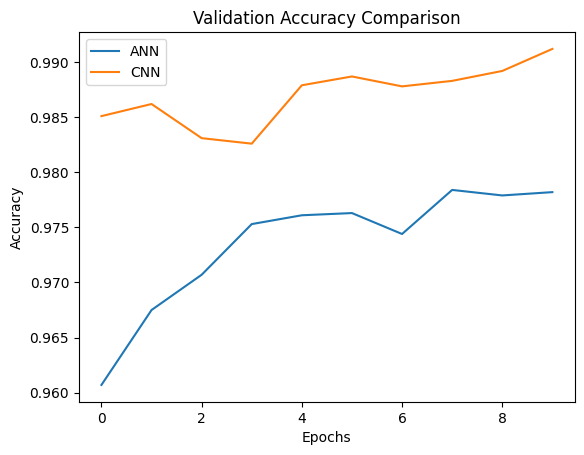

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
dataset = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN (add channel dimension)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Visualizing some images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Fully Connected ANN Model
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_history = ann_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# CNN Model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_data=(x_test_cnn, y_test), verbose=2)

# Evaluate both models
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)

print(f"ANN Test Accuracy: {ann_test_acc:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

# Compare model parameters
ann_params = np.sum([np.prod(v.shape) for v in ann_model.trainable_variables])
cnn_params = np.sum([np.prod(v.shape) for v in cnn_model.trainable_variables])

print(f"ANN Model Parameters: {ann_params}")
print(f"CNN Model Parameters: {cnn_params}")

# Plot accuracy comparison
plt.plot(ann_history.history['val_accuracy'], label='ANN')
plt.plot(cnn_history.history['val_accuracy'], label='CNN')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
